In [2]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
import os
os.chdir(r"D:\Desktop\PYTHON\new class\case study\sales-advertising dataset")
os.listdir()

['advertising.csv']

In [4]:
advertising=pd.DataFrame(pd.read_csv('advertising.csv'))
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
#data inspection
advertising.shape

(200, 4)

In [6]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
advertising.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#Data cleaning

In [9]:
#check null values
advertising.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

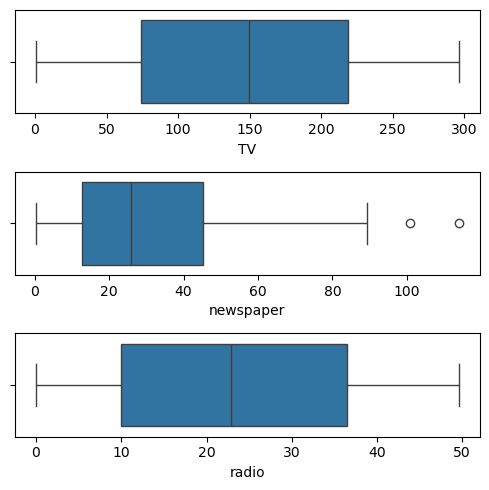

In [11]:
#check for outliers
fig, axs = plt.subplots(3, figsize = (5,5)) #It provides a flexible and concise way to arrange multiple plots within one figure, either horizontally, vertically, or in a grid layout
plt1 = sns.boxplot(x=advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(x=advertising['newspaper'], ax = axs[1])
plt3 = sns.boxplot(x=advertising['radio'], ax = axs[2]) #If axs is a 1D array of subplots, axs[2] refers to the third subplot.
plt.tight_layout() # It ensures that axis labels, titles, and tick labels do not overlap with other subplots or extend beyond the figure's boundaries.


In [12]:
#detecting outliers using z-score
# Calculate mean and standard deviation
mean_n = np.mean(advertising['newspaper'])
std_dev_n = np.std(advertising['newspaper'])

# Compute z-scores
advertising['z_scores_n'] = (advertising['newspaper'] - mean_n) / std_dev_n

# Define threshold
threshold = 3

# Identify outliers
#outliers_n = advertising['newspaper'][np.abs(z_scores_n) > threshold]
outliers = advertising[advertising['z_scores_n'].abs() > threshold]

# Output results
print(outliers)


        TV  radio  newspaper  sales  z_scores_n
16    67.8   36.6      114.0   12.5    3.841171
101  296.4   36.3      100.9   23.8    3.238154


In [13]:
# Treating outliers
advertising['newspaper'].sort_values(ascending=False)

16     114.0
101    100.9
75      89.4
165     84.8
118     79.2
       ...  
42       1.8
139      1.7
8        1.0
65       0.9
33       0.3
Name: newspaper, Length: 200, dtype: float64

In [17]:
# Winsorization: Capping the outliers
lower_cap = np.percentile(advertising['newspaper'], 0)
upper_cap = np.percentile(advertising['newspaper'], 99)
advertising['capped_column'] = np.clip(advertising['newspaper'], lower_cap, upper_cap)

advertising[['capped_column','newspaper']].sort_values(ascending=False,by='capped_column')

,capped_column,newspaper
16,89.515,114.0
101,89.515,100.9
75,89.400,89.4
165,84.800,84.8
118,79.200,79.2
...,...,...
42,1.800,1.8
139,1.700,1.7
8,1.000,1.0
65,0.900,0.9


In [14]:
# another method for treating outlier using inter quartile range
# IQR= Q3-Q1
# upper_bond= IQR*1.5 + Q3
# lower_bond= IQR*1.5 - Q1

Q3= np.percentile(advertising['newspaper'], 75)
Q1= np.percentile(advertising['newspaper'], 25)
IQR= Q3-Q1
upper_bond= IQR*1.5 + Q3
lower_bond= IQR*1.5 - Q1

advertising['capped_column2'] = np.clip(advertising['newspaper'], lower_bond, upper_bond)
advertising[['capped_column2','newspaper']].sort_values(ascending=False,by='capped_column2')

,capped_column2,newspaper
16,93.625,114.0
101,93.625,100.9
75,89.400,89.4
165,84.800,84.8
118,79.200,79.2
...,...,...
102,35.775,21.4
103,35.775,17.9
104,35.775,5.3
25,35.775,19.5


# UNIVARIATE ANALYSIS

## Sales(Target Variable)

{'whiskers': [<matplotlib.lines.Line2D at 0x1bb25746750>,
 'caps': [<matplotlib.lines.Line2D at 0x1bb25746d50>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1bb25746420>],
 'medians': [<matplotlib.lines.Line2D at 0x1bb25747290>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bb25747590>],
 'means': []}

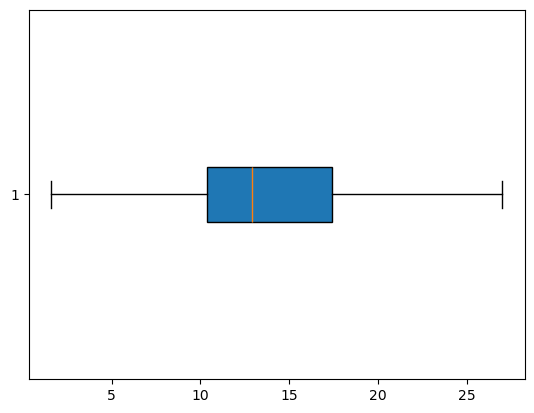

In [22]:
plt.boxplot(advertising['sales'],vert=False,patch_artist=True) #vert: for orientation, patch_artist: for filling color

<Axes: xlabel='sales'>

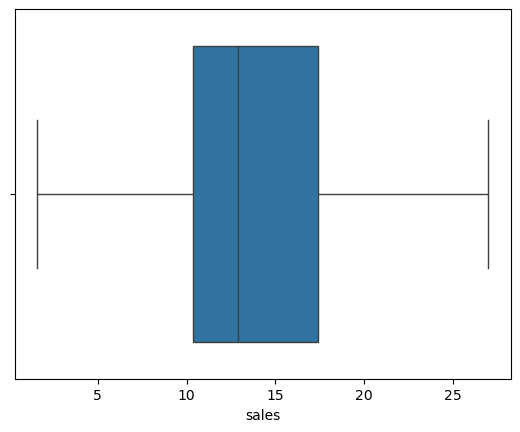

In [25]:
sns.boxplot(x=advertising['sales'])

# BIVARIATE ANALYSIS


In [20]:
# plt.scatter(advertising['TV'],advertising['sales'],s=20,marker='^',c='red',alpha=1)
# plt.xlabel('TV')
# plt.ylabel('sales')

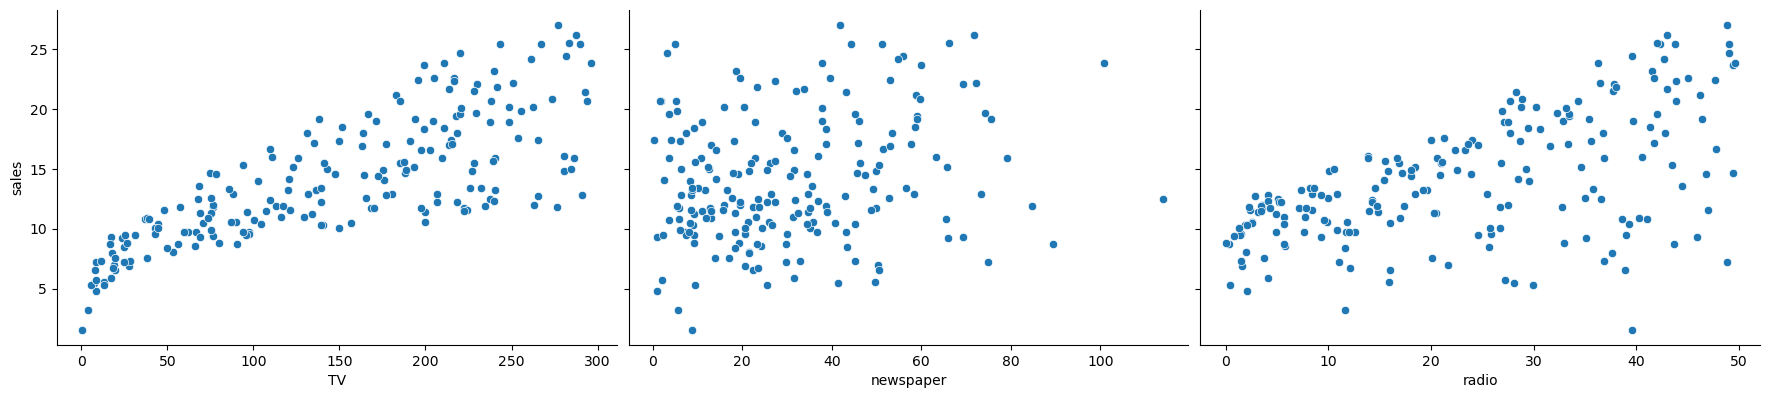

In [36]:
sns.pairplot(advertising, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', height=4, aspect=1.5, kind='scatter')
# height=height of chart, aspect=width
plt.show()

#### correlation 

<Axes: >

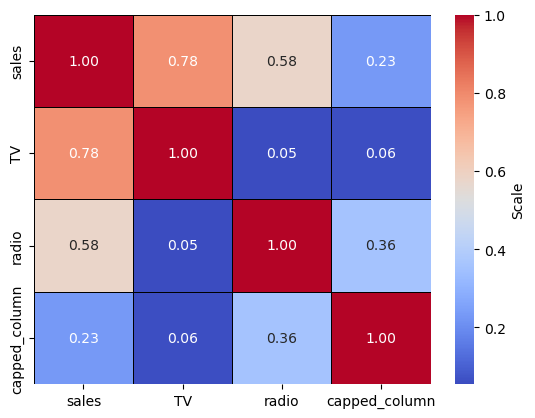

In [47]:
# HEATMAP
sns.heatmap(advertising[['sales','TV','radio','capped_column']].corr(), #correlation between selected columns
            annot=True,         # Show values in cells
            fmt=".2f",          # Format numbers to 2 decimal places
            cmap='coolwarm',    # Colormap (e.g., 'coolwarm', 'viridis',"YlGnBu" etc.)
            linewidths=0.5,     # Add grid lines between cells
            linecolor='black',  # Color of grid lines
            cbar_kws={'label': 'Scale'})  # Customize color bar label

In [77]:
# advertising[['sales','TV','radio','capped_column']].corr()

In [76]:
# # regression line
# independent_vars=advertising[['TV','radio','capped_column']]
# for x_col in independent_vars:
#     sns.regplot(x=x_col, y='sales', data= advertising,
#                 color='red',  # Change color for distinction
#                 line_kws={'linewidth': 2, 'linestyle': '--'},  # Customize line style
#                 scatter_kws={'s': 20, 'alpha': 0.6})  # Customize scatter style
#     plt.title(f"Regression Line: {x_col} vs sales", fontsize=16)
#     plt.xlabel(x_col, fontsize=12)
#     plt.ylabel("sales", fontsize=12)
#     plt.grid(True)
#     plt.show()
 

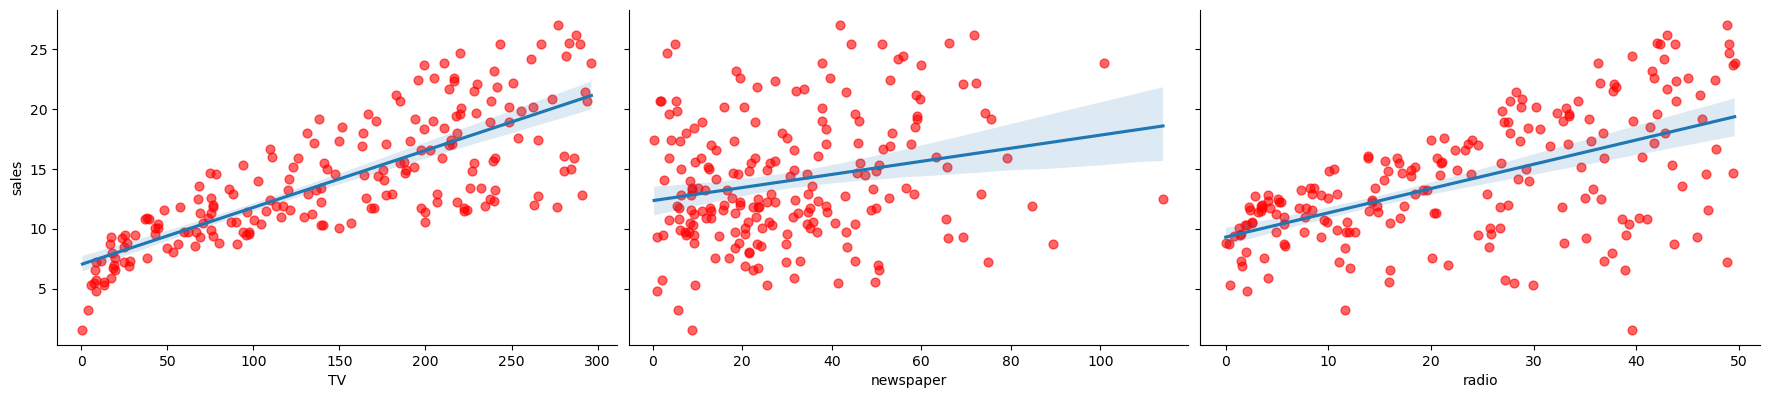

In [75]:
# regression line
sns.pairplot(advertising, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', height=4, aspect=1.5, kind='reg',plot_kws={
        'scatter_kws': {'alpha': 0.6, 'color': 'red', 's': 40}})

##### As is visible from the pairplot and the heatmap, 
##### the variable TV seems to be most correlated with Sales. 
##### So let's go ahead and perform simple linear regression using TV as our feature variable.

# Model Building

### Performing Simple Linear Regression

In [ ]:
Equation of linear regression: y=c+m1x1+m2x2+...+mnxn

In our case:
y=c+m1×

y
  is the response
c
  is the inter  # c is called bias variable because it is a constantcept
m1
  is the coefficient forTVatureTV



### Generic Steps in model building using statsmodels

We first assign the feature variable, TV, in this case
 to the variable X and the response variable, Sales, to the variable y.

In [26]:
X = advertising[['TV','radio']]
y = advertising['sales']

#### Train-Test Split
You now need to split our variable into training and testing sets. You'll perform this by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

Explanation of random_state:
Reproducibility:
If you set a fixed value for random_state, the random shuffling will always produce the same split every time you run the code, making it reproducible. This is useful for ensuring consistent results during experimentation and debugging.

Random Behavior:
If random_state=None (default), the random number generator will use the system time or a random seed, so the split will be different every time you run the code. This introduces variability.

### Building a Linear Model
You first need to import the statsmodel.api library using which you'll perform the linear regression.

In [28]:
import statsmodels.api as sm

By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels. And once you've added the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels as shown below

In [29]:
# Libraries for Sampling & Modeling 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import statsmodels.api as sm

In [31]:
X_train

,TV,radio
74,213.4,24.6
3,151.5,41.3
185,205.0,45.1
26,142.9,29.3
90,134.3,4.9
...,...,...
87,110.7,40.6
103,187.9,17.2
67,139.3,14.5
24,62.3,12.6


In [33]:
model = LinearRegression().fit(X_train, y_train)  # this model do not allow 1 variable linear regression
accuracy_train = model.score(X_train, y_train) 
accuracy_test = model.score(X_test, y_test)
print('Accuracy, Training Set: ', round(accuracy_train*100,5), '%')
print('Accuracy, Test Set: '    , round(accuracy_test*100,5), '%')

Accuracy, Training Set:  89.25083 %
Accuracy, Test Set:  90.92164 %


In [ ]:
# how do you evaluate linear regression
what are the important metrices to validate linear regression
how do you define accuracy
rmse=square(sum(observed-predicted))


In [35]:
#Predict the model results
YPredict_train =  model.predict(X_train)
YPredict_test  =  model.predict(X_test)

#Print model results 
print (" Train Model Results  \n" )
X = X_train
y = y_train
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

 Train Model Results  

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           4.46e-67
Time:                        09:28:51   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7190      0

Text(0.5, 0, 'y_train')

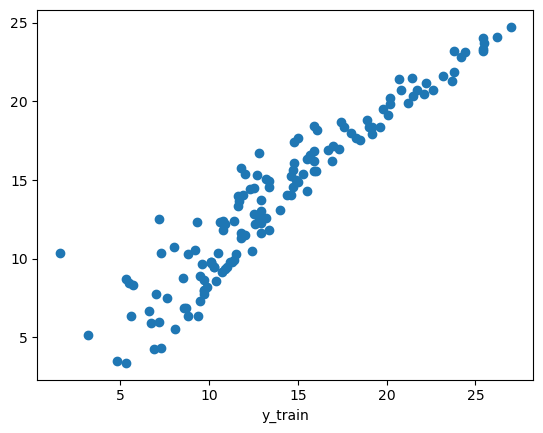

In [37]:
# print actual vs predicted

plt.scatter(y_train, YPredict_train)
plt.xlabel('y_train')

In [ ]:
sns.pairplot(advertising, x_vars=['TV', 'newspaper', 'YPredict_train'], y_vars='sales', height=4, aspect=1.5, kind='scatter')

In [ ]:
# testing this model for test dataset
YPredict_test  =  model.predict(X_test)


In [ ]:
# model validation
# collate all the data into a dataframe
# save the data into excel
# get the equation and use sql to predict the values


In [ ]:
# 🌟 Welcome to My GitHub Profile! 🌟  

![Profile Banner](https://via.placeholder.com/1200x400.png?text=Welcome+to+My+GitHub+Profile!)  

Hello there! 👋 I'm **Shashwati Dey**, a passionate **Data Analyst** with a knack for problem-solving, data storytelling, and impactful project creation. 🚀  

---

## 🧑‍💻 About Me  

- 📊 Data Analyst with expertise in **PL/SQL, Python, Power BI, Advanced Excel**, and **Statistics**.  
- 🌍 GIS enthusiast skilled in **ArcGIS** and **Google Earth Engine**.  
- 🧠 Logical thinker and problem solver with certifications and badges on:  
  - 🏆 **LeetCode**  
  - 🏅 **HackerRank**  
  - 🎓 **NamasteSQL**  
- 📚 Passionate about continuous learning and exploring new dimensions in the data field.  
- 🌐 Active contributor on [LinkedIn](https://linkedin.com/in/yourprofile) & [Kaggle](https://kaggle.com/yourprofile).  

---

## 🚀 Projects I've Worked On  

### 📈 Sales Prediction using Simple Linear Regression  
- **Tools**: Python, Pandas, Matplotlib.  
- **Description**: Predicted future sales trends using historical data to support data-driven decision-making.  

### 🚢 Titanic: Survival Analysis  
- **Tools**: Python (Logistic Regression), SQL.  
- **Description**: Analyzed factors influencing passenger survival using logistic regression, enhancing insights into data preparation and modeling.  

### 🏏 Optimal XI Team Selection (SQL Analysis)  
- **Tools**: SQL, Power BI.  
- **Description**: Leveraged SQL to create data-driven criteria for selecting the best cricket team, ensuring optimized team performance.  

---

## 🔧 Technical Skills  

### Programming Languages & Tools  
<div>
<img src="https://img.icons8.com/color/48/000000/python--v1.png" title="Python"/>  
<img src="https://img.icons8.com/color/48/000000/sql.png" title="SQL"/>  
<img src="https://img.icons8.com/color/48/000000/microsoft-excel-2019--v1.png" title="Excel"/>  
<img src="https://img.icons8.com/color/48/000000/power-bi.png" title="Power BI"/>  
<img src="https://img.icons8.com/color/48/000000/google-earth.png" title="Google Earth Engine"/>  
<img src="https://img.icons8.com/color/48/000000/statistics.png" title="Statistics"/>  
<img src="https://img.icons8.com/color/48/000000/arcgis-desktop.png" title="ArcGIS"/>  
</div>  

### Soft Skills  
- 🔍 Analytical Thinking  
- 🛠 Problem-Solving  
- 📚 Storytelling with Data  

---

## 🏆 Achievements  

- 🥇 Earned **badges** on **LeetCode**, **HackerRank**, and **NamasteSQL**.  
- 🖊️ Authored data-centric projects shared on **Kaggle** and **GitHub**.  

---

## 🌟 Let's Connect!  

Feel free to connect with me to discuss projects, ideas, or collaborations:  

- 🌐 [LinkedIn](https://linkedin.com/in/yourprofile)  
- 📈 [Kaggle](https://kaggle.com/yourprofile)  
- 📧 [Email Me](mailto:yourname@example.com)  

---

![Coding GIF](https://media.giphy.com/media/qgQUggAC3Pfv687qPC/giphy.gif)  

🔗 *"Transforming data into actionable insights and making the world a more data-driven place!"* 🌍  
